In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis
from utils_plotting import plot_class_histograms

# KIDS colors

In [2]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='u-g')

Data shape: (91317, 44)
Droping NANs: 91317 left
Removing flags: 31908 left
Removing errors bigger than 1: 30018 left
Removing limiting magnitudes: 26237 left
Cleaning SDSS: 24021 left
Removing U-G < 0: 23419 left


In [3]:
kids_catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-colors_cut-color__2018-03-12_15:06:47.csv')
kids_catalog.shape

(3697620, 15)

In [4]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([12090,  4098,  7231]),
 array([51.62474914, 17.49861224, 30.87663863]))

In [5]:
describe_column(kids_catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1233179, 1680648,  783793]),
 array([33.35061472, 45.45215571, 21.19722957]))

In [6]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_kids_catalog = kids_catalog.loc[kids_catalog['CLASS'] == 'QSO']

In [7]:
kids_catalog_sampled = kids_catalog.sample(n=500000, random_state=1567)
qso_kids_catalog_sampled = qso_kids_catalog.sample(n=100000, random_state=1567)

## Standalone bands

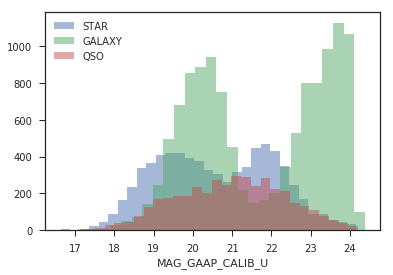

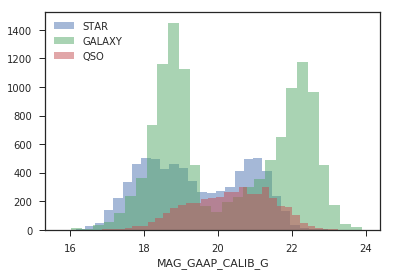

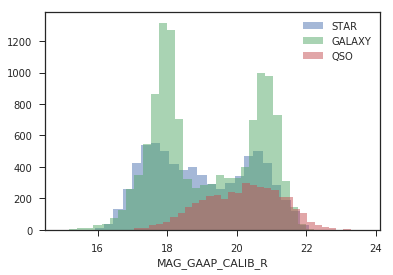

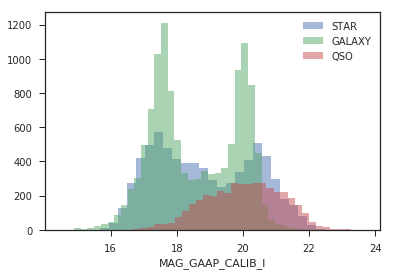

In [11]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

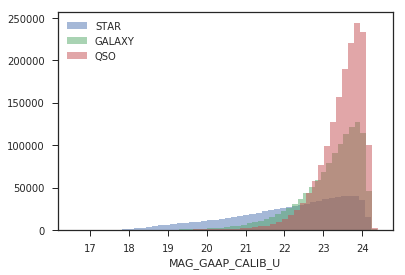

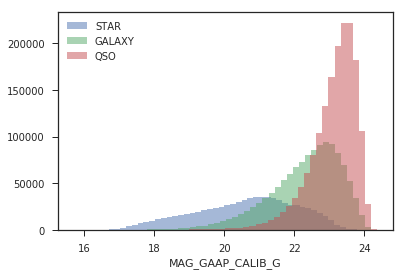

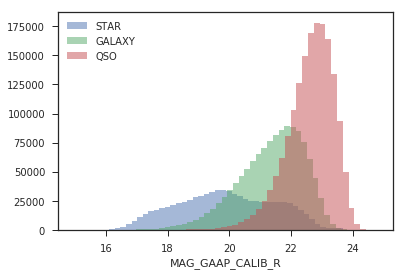

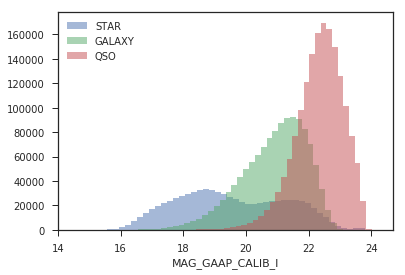

In [12]:
plot_class_histograms(kids_catalog, BAND_CALIB_COLUMNS)

## Paired bands

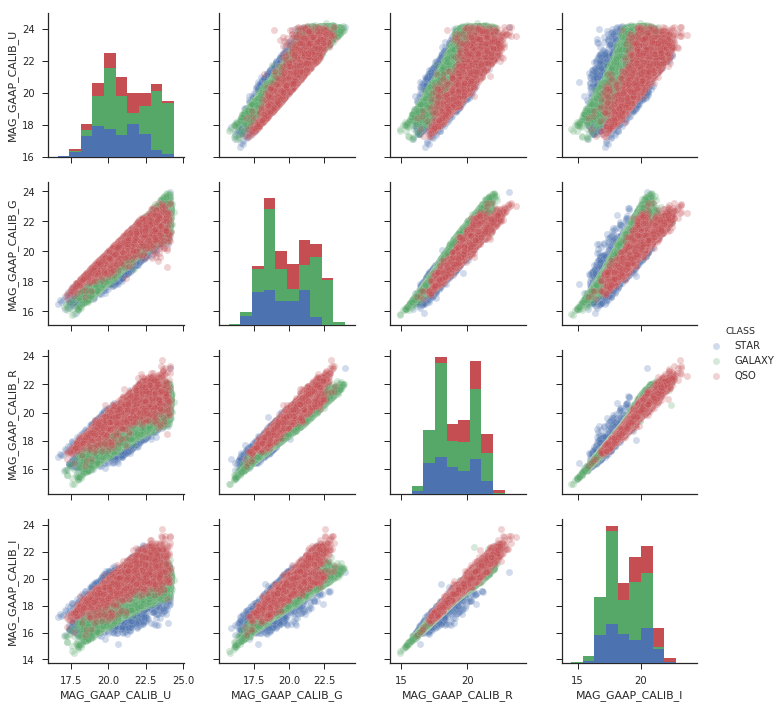

In [13]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

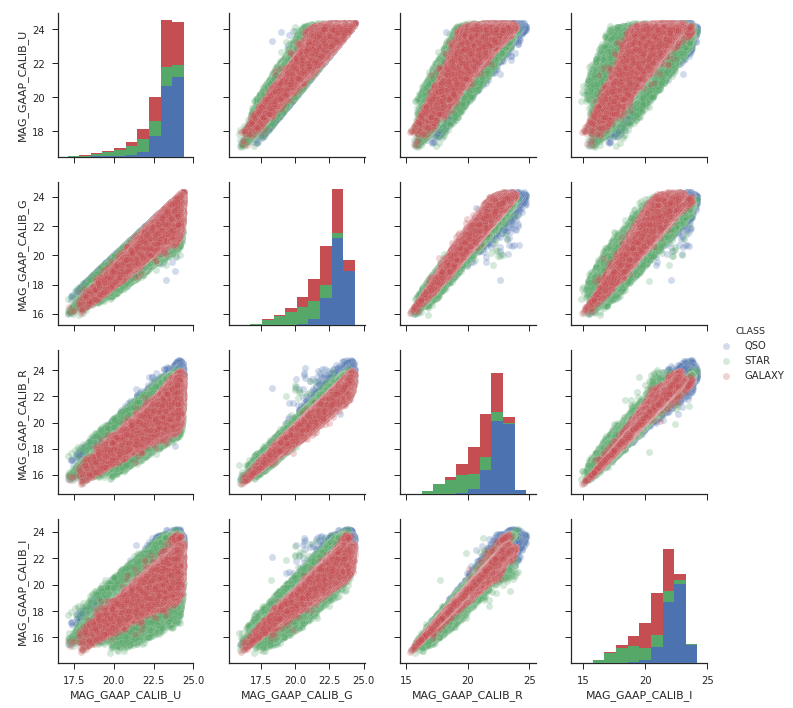

In [14]:
sns.pairplot(kids_catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

## Standalone colors

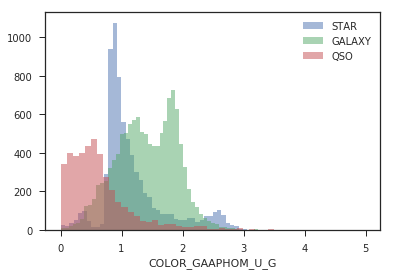

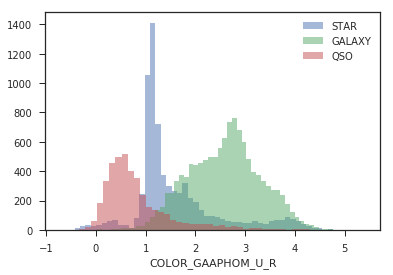

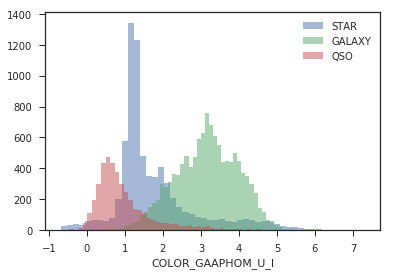

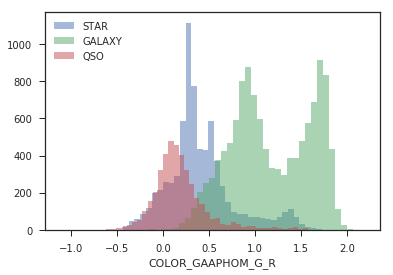

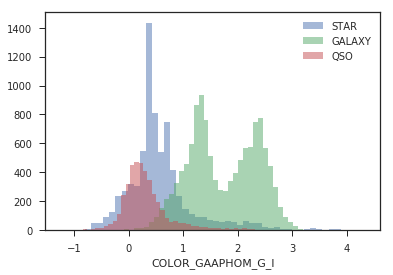

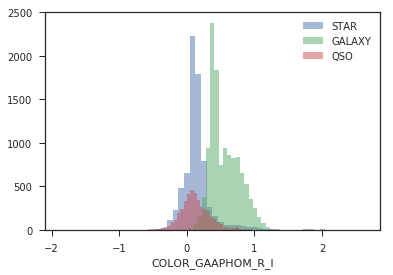

In [15]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

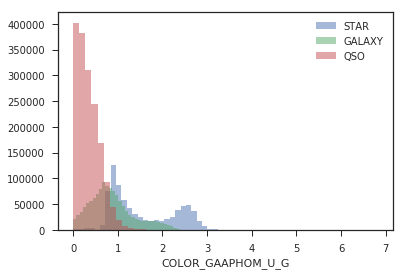

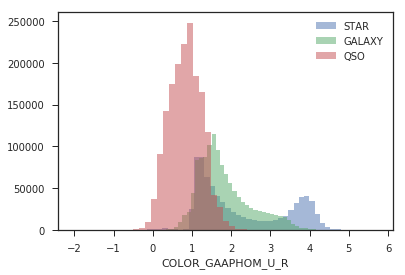

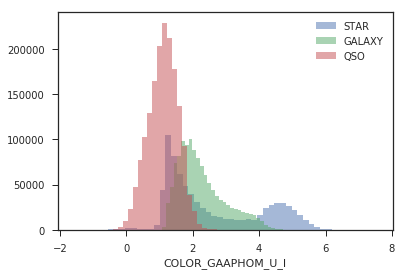

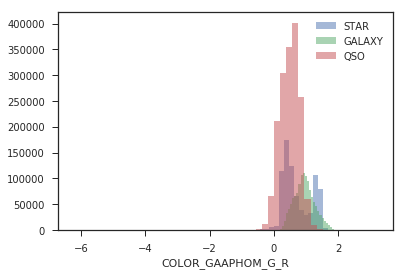

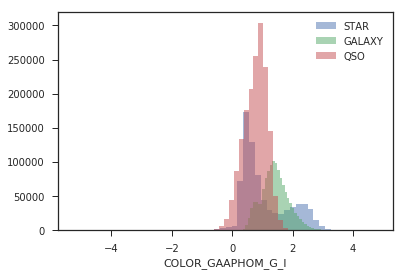

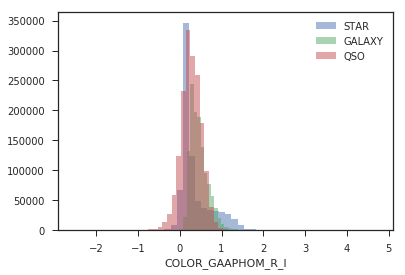

In [16]:
plot_class_histograms(kids_catalog, COLOR_COLUMNS)

## Paired colors

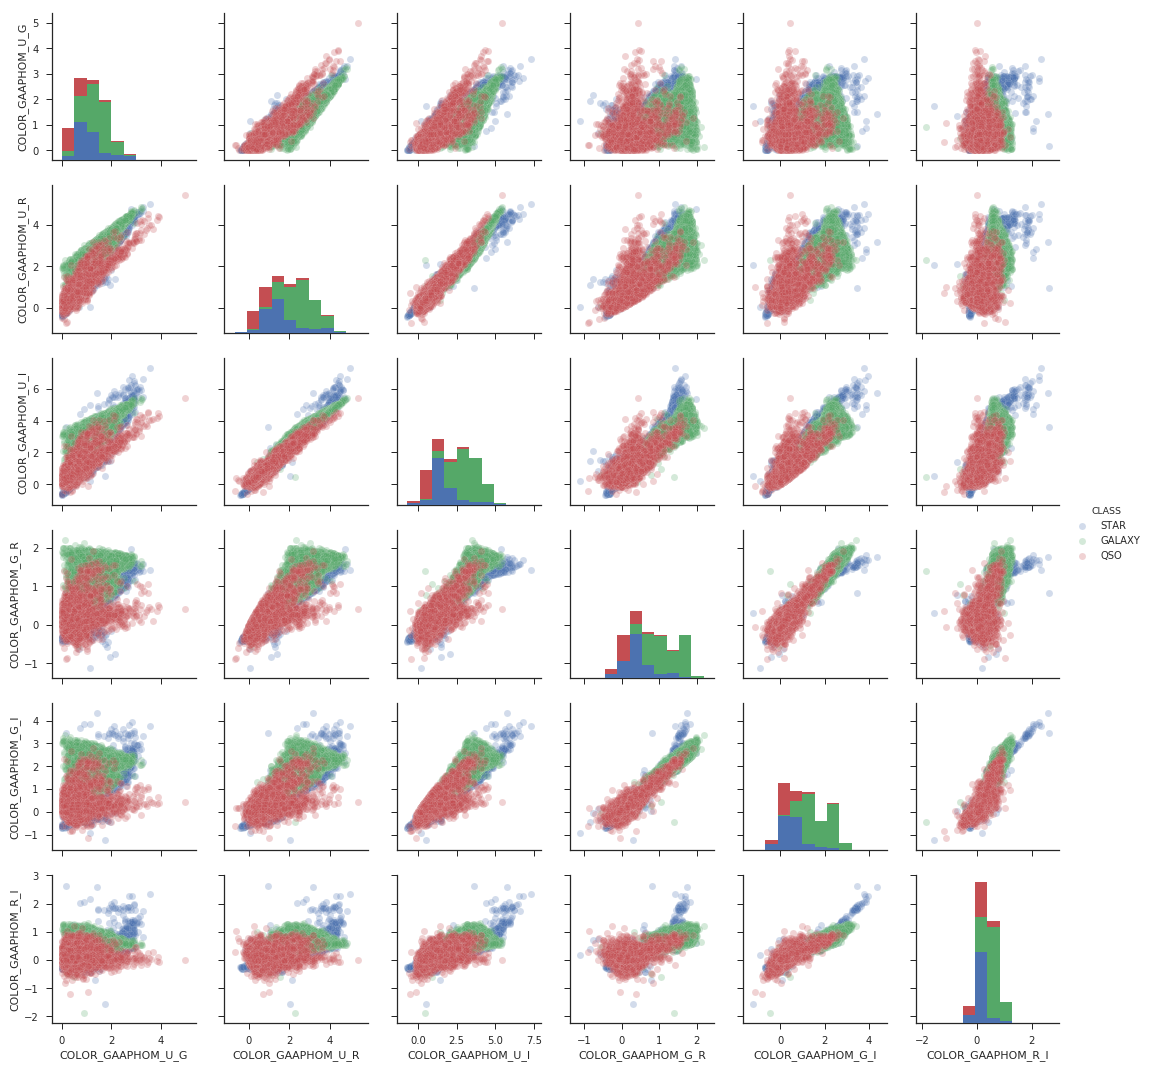

In [17]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

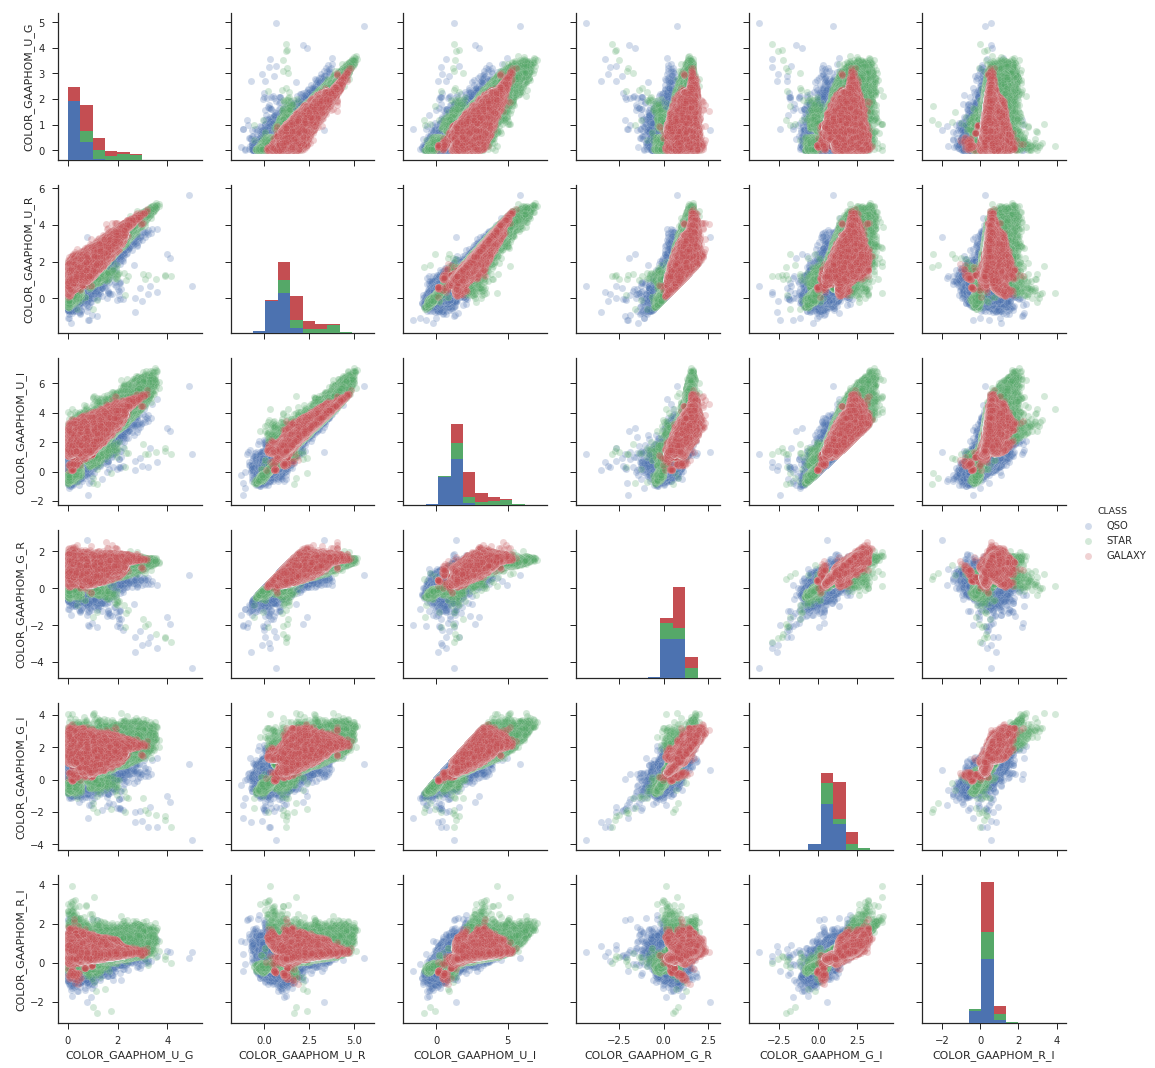

In [19]:
sns.pairplot(kids_catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

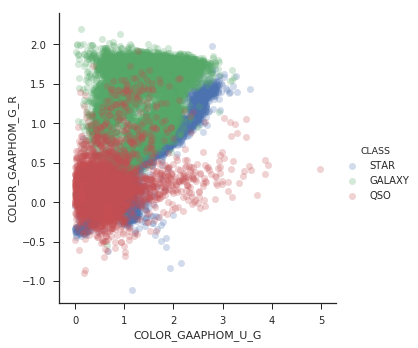

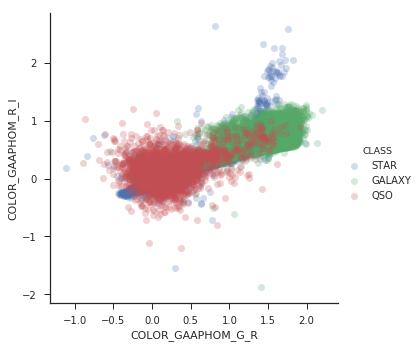

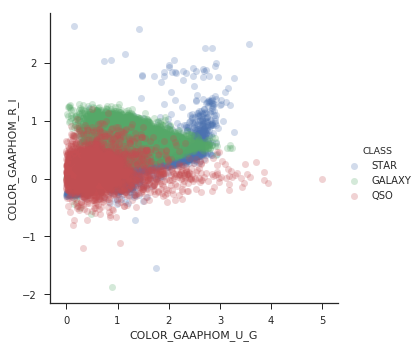

In [20]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

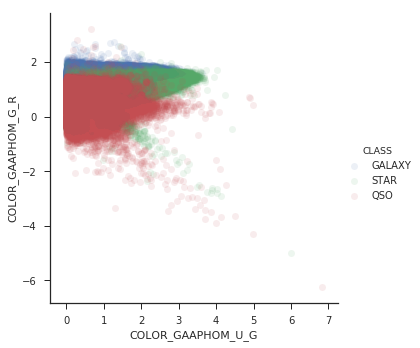

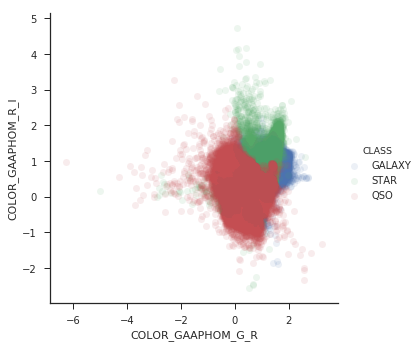

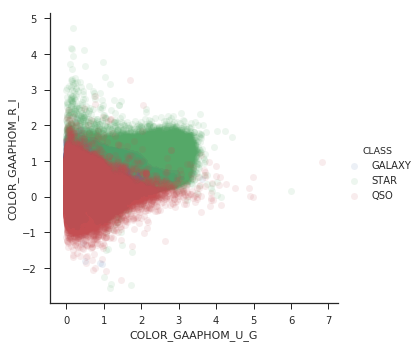

In [21]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_catalog, fit_reg=False, scatter_kws={'alpha': 0.1})

## QSO color pairs

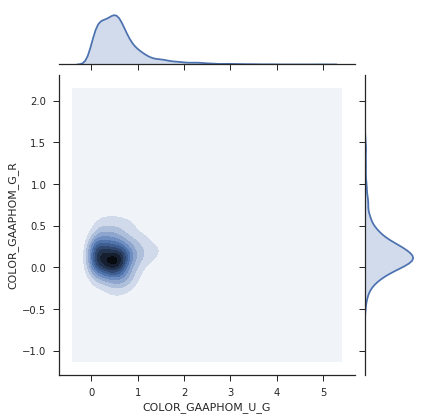

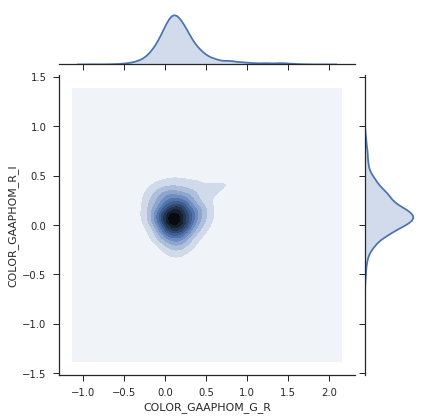

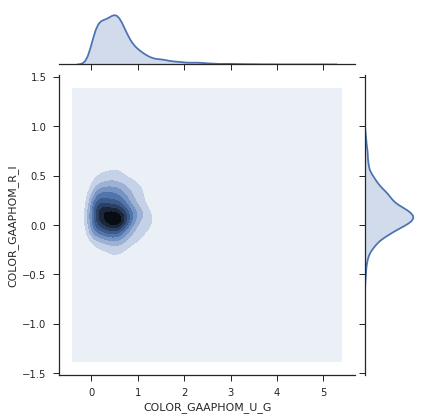

In [22]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

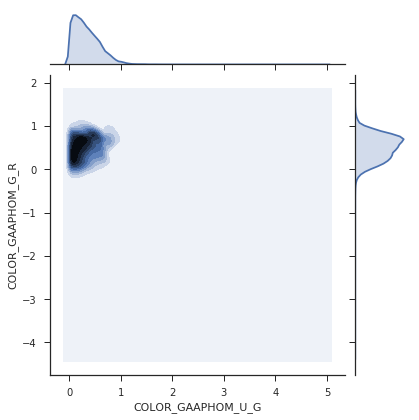

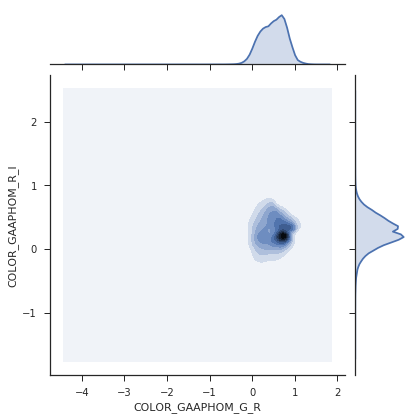

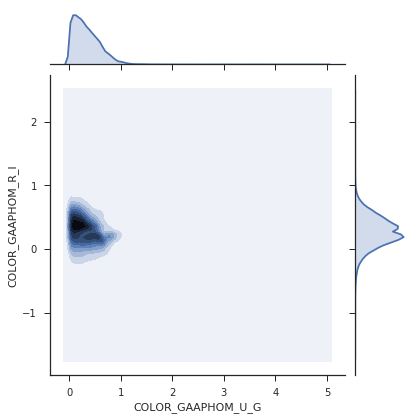

In [29]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_catalog_sampled[b_1], qso_kids_catalog_sampled[b_2], kind='kde', stat_func=None)

## High probability QSOs

In [16]:
qso_high = kids_catalog.loc[kids_catalog['QSO'] > 0.9]
qso_high.shape

(658951, 15)

In [17]:
qso_high_sampled = qso_high.sample(n=100000, random_state=1567)

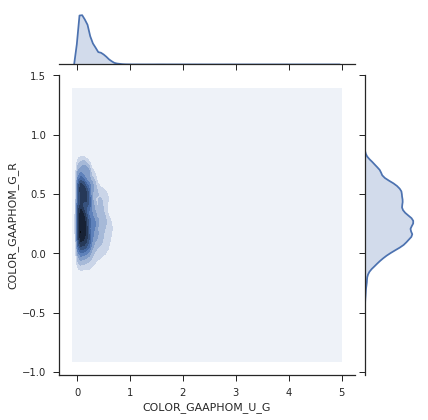

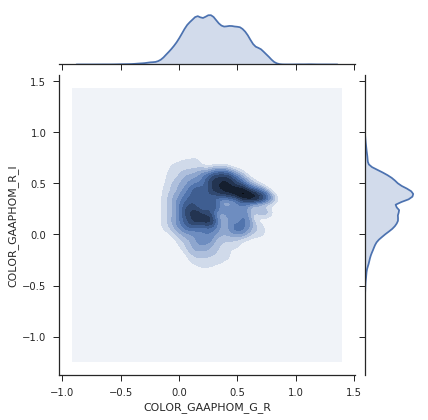

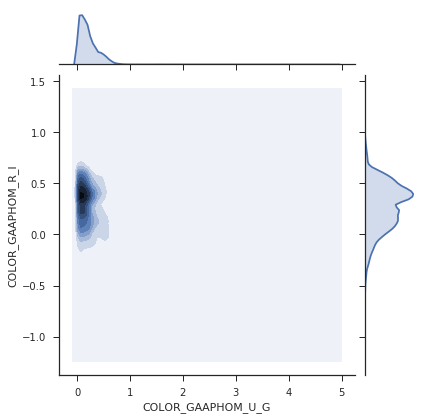

In [18]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_high_sampled[b_1], qso_high_sampled[b_2], kind='kde', stat_func=None)

# Number count analysis

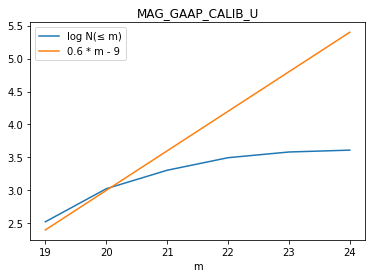

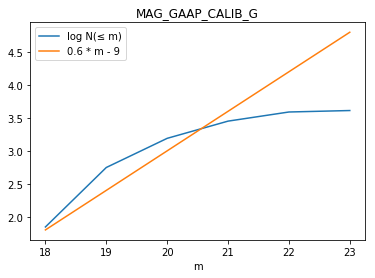

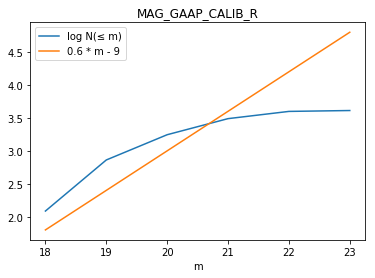

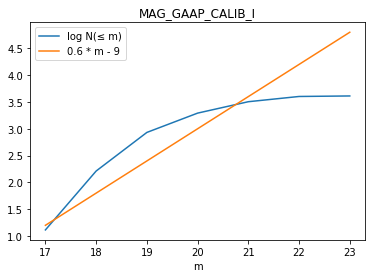

In [8]:
number_count_analysis(qso_kids_sdss, c=9)

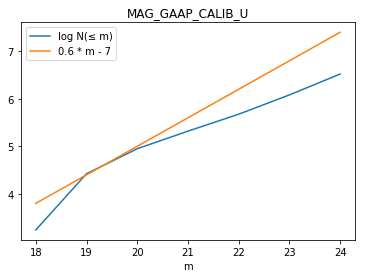

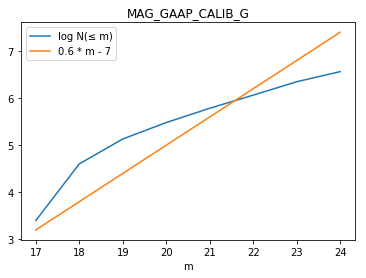

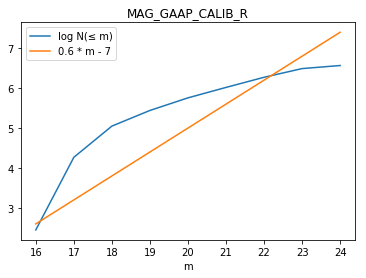

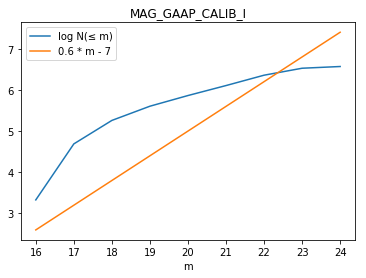

In [9]:
number_count_analysis(kids_catalog, c=7)

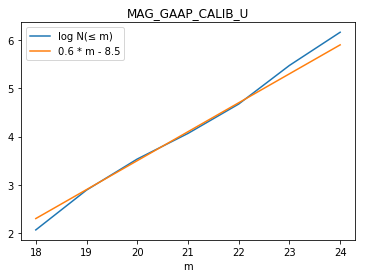

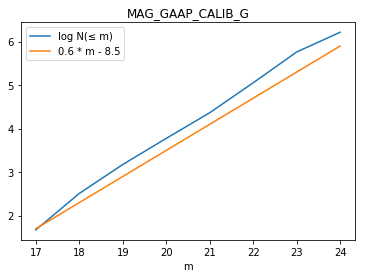

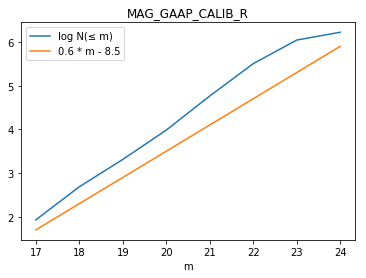

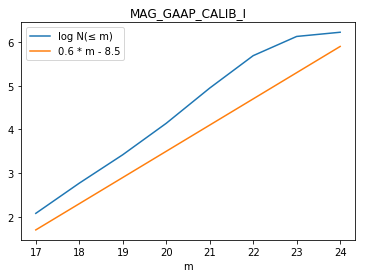

In [10]:
number_count_analysis(qso_kids_catalog, c=8.5)